In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os
import pathlib

import zipfile


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# # unzip the data
# zip_file='/content/drive/MyDrive/Colab Notebooks/Melanoma/CNN_assignment.zip'
# distination='/content/drive/MyDrive/Colab Notebooks/Melanoma'
# with zipfile.ZipFile(zip_file,'r') as z:
#   z.extractall(distination)

In [39]:
for i,j,k in os.walk('/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration'):
    print(f'The folders present in the directory is {len(j)} and total images are {len(k)}')

The folders present in the directory is 2 and total images are 0
The folders present in the directory is 9 and total images are 0
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 3
The folders present in the directory is 0 and total images are 16
The folders present in the directory is 0 and total images are 3
The folders present in the directory is 9 and total images are 0
The folders present in the directory is 0 and total images are 114
The folders present in the directory is 0 and total images are 376
The folders present in the directory is 0 and total images are 95
The folders p

In [ ]:
os.listdir('/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output')

In [5]:
# seeing whate is the in the folder
path ='/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration'
path

'/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration'

In [18]:
# using list dir function
class_names=os.listdir(path+'/'+'Train')
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [36]:
import shutil

In [1]:
# for i in os.listdir(path):
#     for j in class_names:
#         if i=='Train':
#             path1=path+'/'+i # entering in to train folder only
#             path2=path1+'/'+j+'/'+'output'
#             shutil.rmtree(path2)
#         print('foler has been removed')
            
            

In [40]:
train_data=pathlib.Path('/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
test_data=pathlib.Path('/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [41]:
train_data

WindowsPath('/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [42]:
# we can view the random image
import random

(-0.5, 1023.5, 767.5, -0.5)

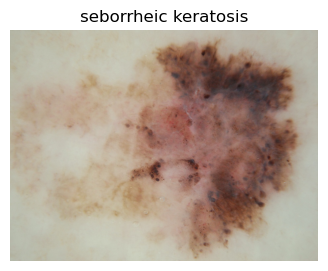

In [43]:
class_name=random.choice(os.listdir(train_data))
directory='/Train'
final_path=path+directory+'/'+class_name
img=final_path + '/' + random.choice(os.listdir(final_path))
plt.figure(figsize=(4,3))

import matplotlib.image as mfimg
img=mfimg.imread(img)
plt.title(class_name)
plt.imshow(img)
plt.axis(False)

In [44]:
image_train_data=len(list(train_data.glob('*/*.jpg')))
image_test_data=len(list(test_data.glob('*/*.jpg')))

print(f'THe Number of Images Present in the train data is {image_train_data}')

print(f'THe Number of Images Present in the test data is {image_test_data}')

THe Number of Images Present in the train data is 2239
THe Number of Images Present in the test data is 118


In [45]:
# define the preprocessing parameters
Batch_size=32
image_size=(180,180)

# Create an imageDatagenerator with resccaling parameter
train_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
validation_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
# test_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [46]:
# Flow images from train and validation directories, applying rescaling and resizing
train_data_generator=  train_data_gen.flow_from_directory(directory=train_data,
                                                          class_mode='categorical',
                                                          batch_size=Batch_size,
                                                          target_size=image_size,
                                                          shuffle=True,
                                                          seed=42)
# Flow images from train and validation directories, applying rescaling and resizing
# test_data_generator=  test_data_gen.flow_from_directory(directory=test_data,
#                                                           class_mode='categorical',
#                                                           batch_size=Batch_size,
#                                                           target_size=image_size,
#                                                           seed=42)

Found 2239 images belonging to 9 classes.


In [47]:
# Flow images from train and validation directories, applying rescaling and resizing
validation_data_generator=  validation_data_gen.flow_from_directory(directory=train_data,
                                                          class_mode='categorical',
                                                          batch_size=Batch_size,
                                                          target_size=image_size,
                                                          shuffle=False,
                                                          subset='validation',  # Specify 'validation' subset for validation data
                                                          seed=42)

Found 444 images belonging to 9 classes.


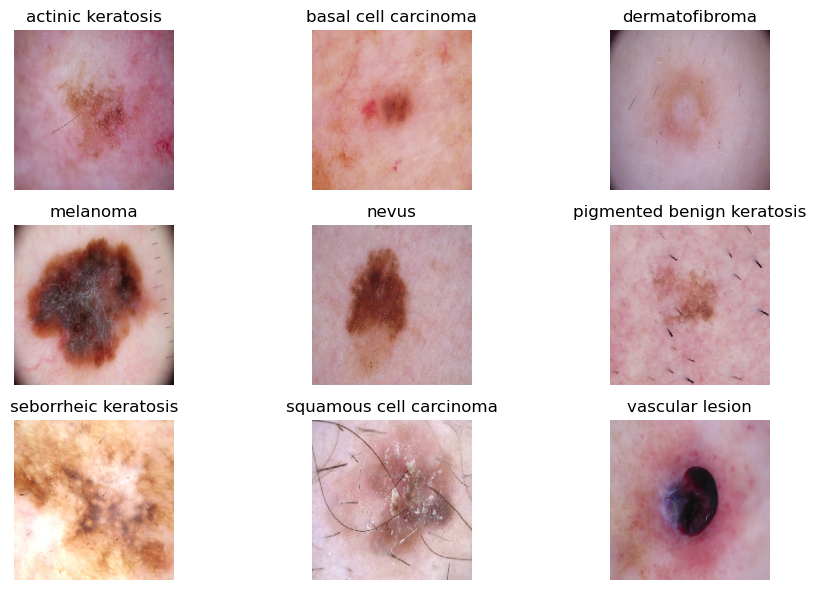

In [48]:
from tensorflow.keras.preprocessing.image import load_img

# Define the path to the train folder
train_folder = train_data  # Replace this with the actual path to your train folder

# Get the list of class folders
class_folders = sorted(os.listdir(train_folder))

# Create a plot with subplots for each class
fig, axes = plt.subplots(3, 3, figsize=(10,6))
axes = axes.flatten()
# Iterate over each class folder
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(train_folder, class_folder)
    class_images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    # Randomly select one image from the class
    random_image = random.choice(class_images)
    random_image_path = os.path.join(class_path, random_image)

    # Load and display the image
    image = load_img(random_image_path, target_size=(180, 180))
    axes[i].imshow(image)
    axes[i].set_title(class_folder)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [49]:
class_names=os.listdir(train_data)

In [50]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

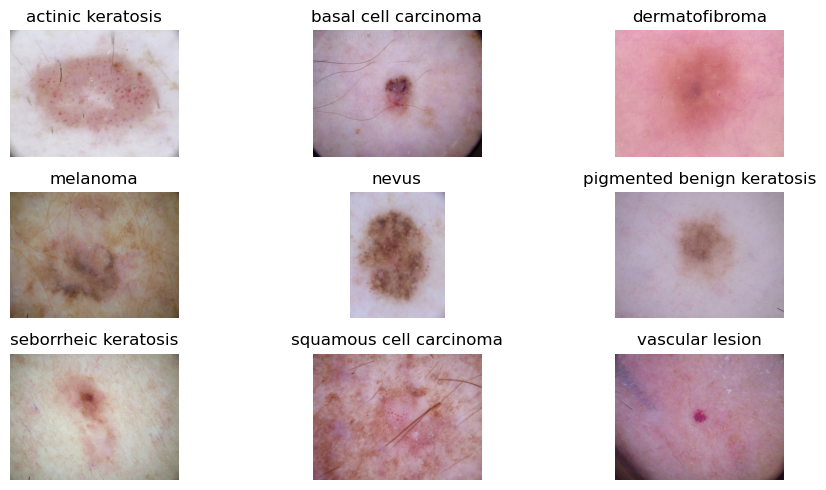

In [51]:
# my own code
class_names=sorted(class_names)
image_path=train_data
plt.figure(figsize=(10,5))
for i in range(9):
  # seect the ranom image from the class
  class_path=os.path.join(image_path,class_names[i])
  image=os.listdir(class_path)
  random_image=random.choice(image)
  random_image_path=os.path.join(class_path,random_image)
  # print(random_image_path)
  # Load and display the image
  img = plt.imread(random_image_path)

  # Plot the image on a subplot
  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(class_names[i])
  plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()




Autotuning, in the context of machine learning or deep learning, refers to the process of automatically selecting the best hyperparameters for a model. Hyperparameters are configuration settings that are not learned during training, such as the learning rate, batch size, number of layers, and activation functions.

Autotuning techniques typically involve performing a search over a predefined hyperparameter space to find the combination of hyperparameters that results in the best performance on a validation set. This search can be done using various optimization algorithms, such as grid search, random search, or more advanced techniques like Bayesian optimization or genetic algorithms.

In [52]:
train_data_generator.samples// train_data_generator.batch_size

69

In [53]:
train_data_generator.samples

2239

In [54]:
 train_data_generator.batch_size

32

In [55]:
# building a model


model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=5,activation='relu',input_shape=(180,180,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
     tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64,5,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128,5,activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(), # Flatten layer
    tf.keras.layers.Dense(9,activation=tf.keras.activations.softmax)
])




In [56]:
# compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

steps_per_epoch=train_data_generator.samples// train_data_generator.batch_size

history_1=model_1.fit(train_data_generator,
                   epochs=20,
                   steps_per_epoch=steps_per_epoch,validation_data=validation_data_generator,
                      validation_steps=  validation_data_generator.samples // validation_data_generator.batch_size)

Epoch 1/20


69/69 [==============================] - 95s 1s/step - loss: 2.0821 - accuracy: 0.2506 - val_loss: 1.8784 - val_accuracy: 0.4255
Epoch 2/20
69/69 [==============================] - 95s 1s/step - loss: 1.7292 - accuracy: 0.3675 - val_loss: 1.6217 - val_accuracy: 0.4231
Epoch 3/20
69/69 [==============================] - 118s 2s/step - loss: 1.6168 - accuracy: 0.4191 - val_loss: 1.5477 - val_accuracy: 0.4207
Epoch 4/20
69/69 [==============================] - 116s 2s/step - loss: 1.6243 - accuracy: 0.4164 - val_loss: 1.5964 - val_accuracy: 0.4135
Epoch 5/20
69/69 [==============================] - 116s 2s/step - loss: 1.5356 - accuracy: 0.4540 - val_loss: 1.4199 - val_accuracy: 0.5192
Epoch 6/20
69/69 [==============================] - 118s 2s/step - loss: 1.4715 - accuracy: 0.4712 - val_loss: 1.3687 - val_accuracy: 0.5288
Epoch 7/20
69/69 [==============================] - 114s 2s/step - loss: 1.4521 - accuracy: 0.4871 - val_loss: 1.4080 - val_accuracy: 0.5000
Epoch 8/20
69

In [57]:
model_1.evaluate(validation_data_generator)

14/14 [==============================] - 11s 767ms/step - loss: 0.9706 - accuracy: 0.6419


[0.9706058502197266, 0.6418918967247009]

In [58]:
# visualizing the results of loss curves and accuracy score of train and validation data
def plot_loss(history,figsiz):
    '''returns separate loss curves for training and validation metrics'''
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(len(history.history['loss']))

    plt.figure(figsize=(figsiz))
    plt.subplot(1,2,1)
#     plots
    plt.plot(epochs,loss,label='training loss')
    plt.plot(epochs,val_loss,label='validation loss')
    plt.title('Loss of both training and validation ')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1,2,2)
    #accuracy plot and val accuracy

    plt.plot(epochs,accuracy,label='accuracy ')
    plt.plot(epochs,val_accuracy,label='val_accuracy ')
    plt.title('accuracy of both training and validation ')
    plt.xlabel('Epochs')
    plt.legend()

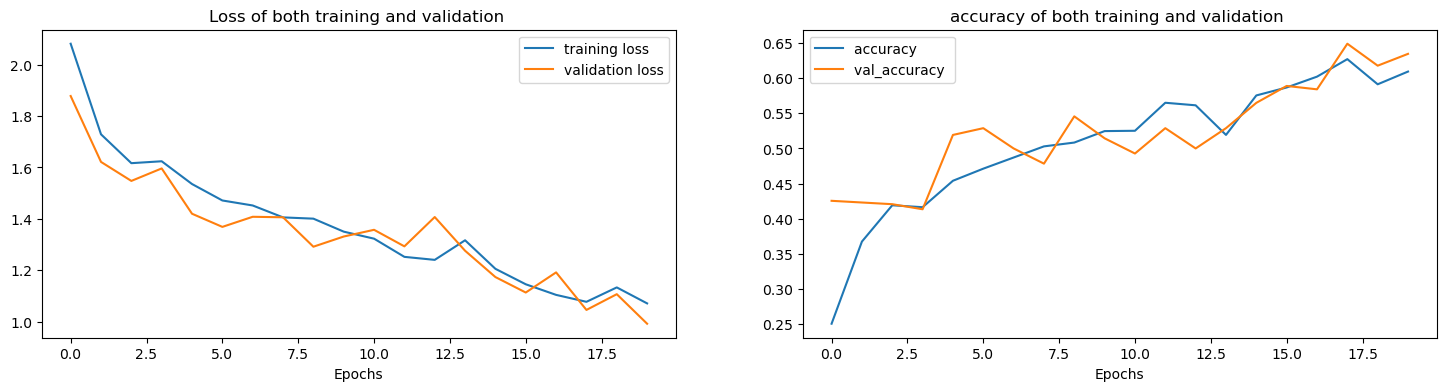

In [59]:
plot_loss(history_1,(18,4))

Evaluation: I have monitored the training and validation loss and accuracy over epochs, which provides insights into the model's performance and whether it's overfitting or underfitting.

Results: The training seems to progress steadily, with increasing accuracy and decreasing loss over epochs. However, there might be `some overfitting` as the `validation loss starts to increase slightly` after a certain number of epochs.

#### using the dropoout layer we might see some `overfitting in the model`

In [60]:
model_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(180,180,3)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Flatten layer
    tf.keras.layers.Flatten(),

    # Dense (fully connected) tf.keras.layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with softmax activation for multiclass classification
    tf.keras.layers.Dense(9, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [61]:
# Print the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 43, 43, 64)       

In [62]:
# fitting the model_2
batch_size=32
history_2 = model_2.fit(train_data_generator,epochs=20,
                        steps_per_epoch=train_data_generator.samples // batch_size,
                        validation_data=validation_data_generator,
                        validation_steps=validation_data_generator.samples // batch_size
)

Epoch 1/20
69/69 [==============================] - 96s 1s/step - loss: 2.1045 - accuracy: 0.1835 - val_loss: 2.0137 - val_accuracy: 0.2091
Epoch 2/20
69/69 [==============================] - 94s 1s/step - loss: 2.0059 - accuracy: 0.2121 - val_loss: 1.8417 - val_accuracy: 0.2115
Epoch 3/20
69/69 [==============================] - 94s 1s/step - loss: 1.9033 - accuracy: 0.2814 - val_loss: 1.6770 - val_accuracy: 0.3774
Epoch 4/20
69/69 [==============================] - 97s 1s/step - loss: 1.7431 - accuracy: 0.3534 - val_loss: 1.7117 - val_accuracy: 0.3389
Epoch 5/20
69/69 [==============================] - 94s 1s/step - loss: 1.6801 - accuracy: 0.3734 - val_loss: 1.5232 - val_accuracy: 0.4519
Epoch 6/20
69/69 [==============================] - 93s 1s/step - loss: 1.6647 - accuracy: 0.3928 - val_loss: 1.5621 - val_accuracy: 0.3894
Epoch 7/20
69/69 [==============================] - 94s 1s/step - loss: 1.5994 - accuracy: 0.4273 - val_loss: 1.4850 - val_accuracy: 0.4736
Epoch 8/20
69/69 [==

In [63]:
model_2.evaluate(validation_data_generator)

14/14 [==============================] - 9s 676ms/step - loss: 1.2197 - accuracy: 0.5518


[1.2197425365447998, 0.5518018007278442]

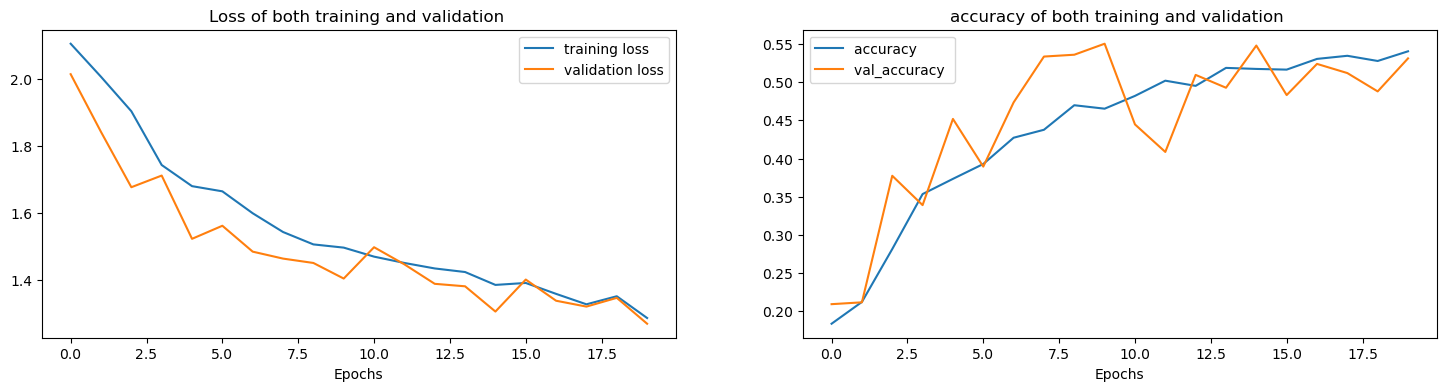

In [64]:
plot_loss(history_2,(18,4))

In [65]:
# # data augumentation techniuqes
# data_augument=tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical',input_shape=(180,180,3)),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3)),
# #     tf.keras.layers.experimental.preprocessing.Rescaling(scale=1/255.)
# ])

data_augument=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.2, rescale=1./255,
                                                              fill_mode='nearest',
                                                              horizontal_flip=True,
                                                              vertical_flip=True,
                                                              height_shift_range=0.2,
                                                              width_shift_range=0.3,
                                                              zoom_range=0.2,
                                                              shear_range=0.2,)

In [66]:
# Create augmented training data generator
train_data_generator_augmented = data_augument.flow_from_directory(directory=train_data,
                                                                   class_mode='categorical',
                                                                   batch_size=32,
                                                                   target_size=(180,180),
                                                                   shuffle=True,
                                                                   seed=42,
                                                                   subset='training'  # Specify 'training' subset for augmented data
)

Found 2239 images belonging to 9 classes.


In [67]:
images,lables=train_data_generator_augmented.next()
images[0],lables[:10]

(array([[[0.8263558 , 0.6818267 , 0.7626828 ],
         [0.82719296, 0.6651622 , 0.7613606 ],
         [0.82100815, 0.6403935 , 0.7397632 ],
         ...,
         [0.83122826, 0.7157585 , 0.77443767],
         [0.8312233 , 0.71576095, 0.7744352 ],
         [0.83121836, 0.71576345, 0.7744327 ]],
 
        [[0.82264346, 0.6826111 , 0.7591816 ],
         [0.82708997, 0.6608273 , 0.7486586 ],
         [0.8211941 , 0.6393597 , 0.73987824],
         ...,
         [0.83674854, 0.7129984 , 0.77409863],
         [0.83676344, 0.7129909 , 0.77410114],
         [0.83677834, 0.7129834 , 0.7741036 ]],
 
        [[0.8291923 , 0.68328196, 0.75630695],
         [0.83846176, 0.6721668 , 0.7600304 ],
         [0.8263517 , 0.64612305, 0.7475932 ],
         ...,
         [0.8477818 , 0.70268375, 0.7722057 ],
         [0.8477743 , 0.70267624, 0.77219576],
         [0.8477668 , 0.7026688 , 0.77218586]],
 
        ...,
 
        [[0.0626671 , 0.04376162, 0.12779248],
         [0.1652765 , 0.10285536, 0.20331

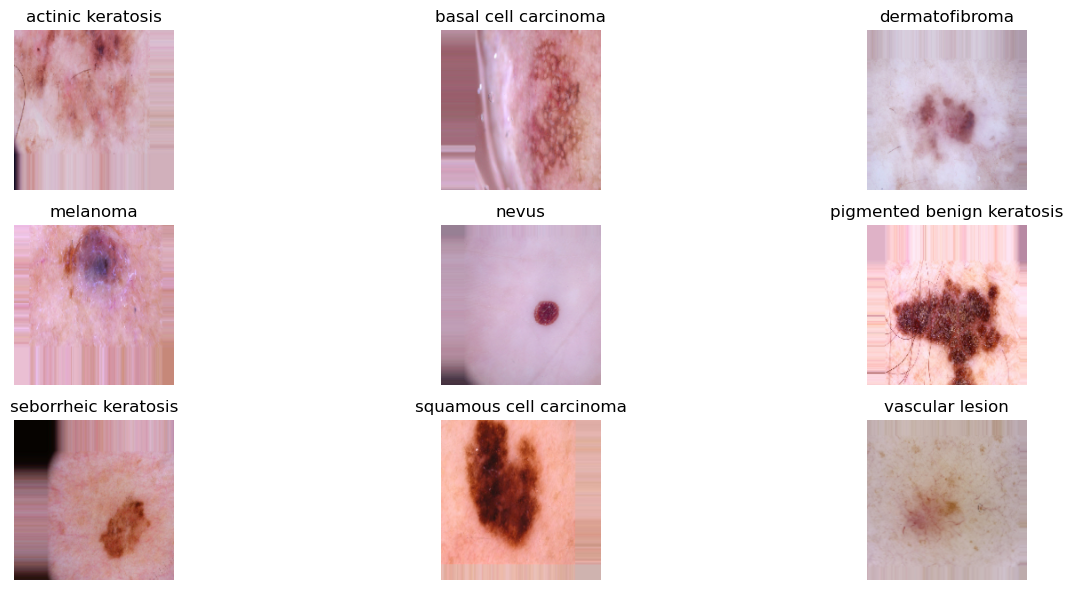

In [68]:


plt.figure(figsize=(15,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  plt.axis(False)
  plt.title(class_names[i])
plt.tight_layout()
plt.show()

In [69]:
history_2_augmented = model_2.fit(train_data_generator_augmented,epochs=20,
                                  steps_per_epoch=train_data_generator_augmented.samples // batch_size,
                                  validation_data=validation_data_generator,
                                  validation_steps=validation_data_generator.samples // batch_size
)

Epoch 1/20
69/69 [==============================] - 108s 2s/step - loss: 1.5512 - accuracy: 0.4413 - val_loss: 1.3976 - val_accuracy: 0.4688
Epoch 2/20
69/69 [==============================] - 103s 1s/step - loss: 1.4853 - accuracy: 0.4622 - val_loss: 1.4476 - val_accuracy: 0.5096
Epoch 3/20
69/69 [==============================] - 106s 2s/step - loss: 1.4882 - accuracy: 0.4540 - val_loss: 1.3948 - val_accuracy: 0.4904
Epoch 4/20
69/69 [==============================] - 105s 2s/step - loss: 1.4775 - accuracy: 0.4604 - val_loss: 1.3605 - val_accuracy: 0.4543
Epoch 5/20
69/69 [==============================] - 107s 2s/step - loss: 1.4418 - accuracy: 0.4903 - val_loss: 1.3692 - val_accuracy: 0.4856
Epoch 6/20
69/69 [==============================] - 102s 1s/step - loss: 1.4568 - accuracy: 0.4805 - val_loss: 1.4051 - val_accuracy: 0.4495
Epoch 7/20
69/69 [==============================] - 103s 1s/step - loss: 1.4570 - accuracy: 0.4807 - val_loss: 1.5353 - val_accuracy: 0.3678
Epoch 8/20
69

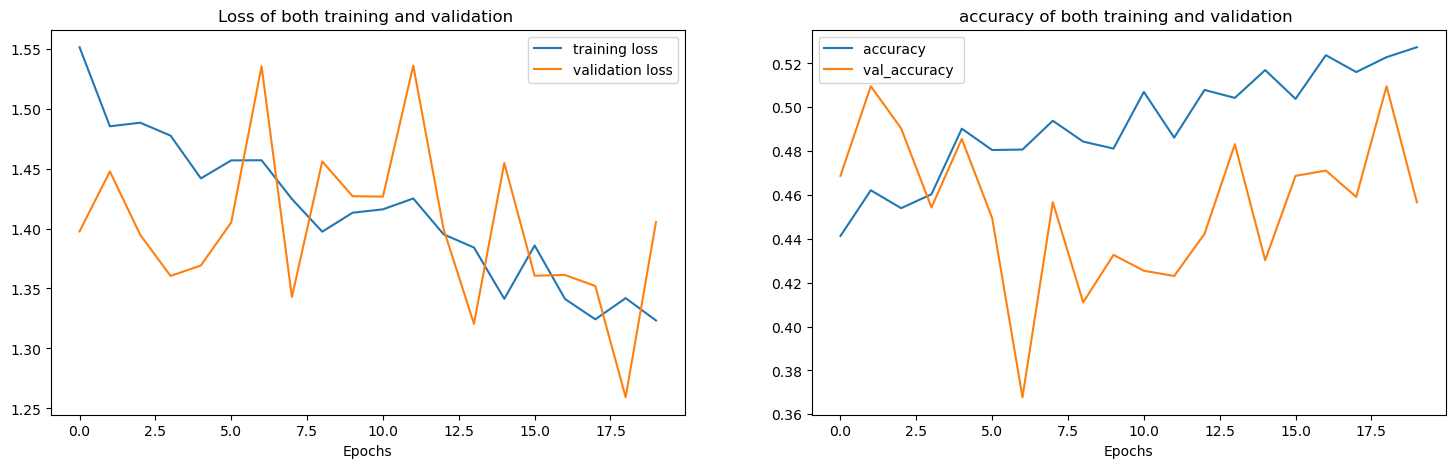

In [70]:
plot_loss(history_2_augmented,(18,5))

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [71]:
train_data

WindowsPath('/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [72]:
path_list=[]
class_list=[]
for i in class_names:
    for j in train_data.glob(i+'/*.jpg'):
        path_list.append(str(j))
        class_list.append(str(i))
        

In [73]:
pd.set_option('display.max_colwidth',150)

In [74]:
df=pd.DataFrame(list(zip(path_list,class_list)),columns=['path','label'])

In [75]:
print(df.shape)
df.head()

(2239, 2)


,path,label
0,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis


In [76]:
label_counts = df['label'].value_counts()
label_counts

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: label, dtype: int64

In [77]:
label_counts.values

array([462, 438, 376, 357, 181, 139, 114,  95,  77], dtype=int64)

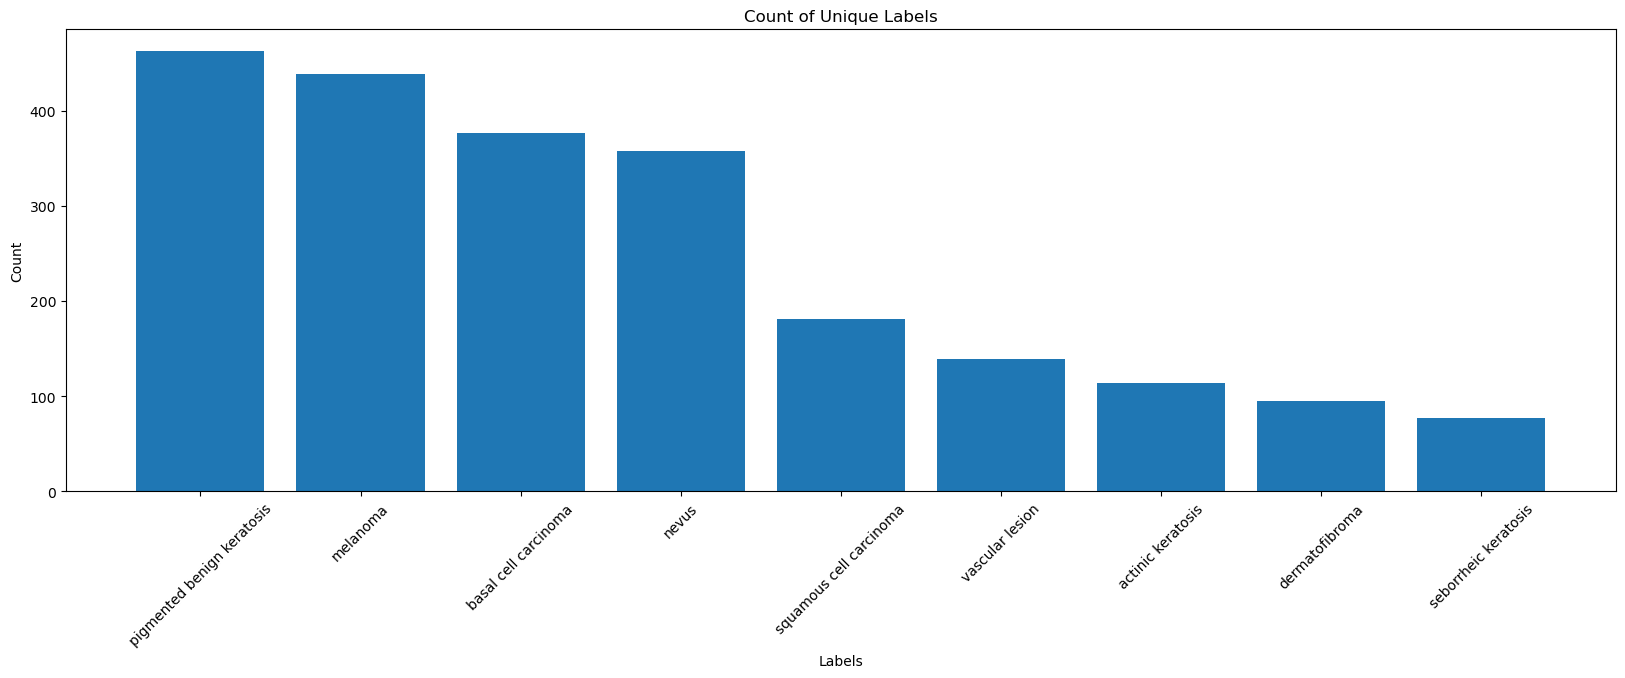

In [78]:
# Plotting the count of unique labels
plt.figure(figsize=(20, 6))
plt.bar(label_counts.index, label_counts.values)
plt.title('Count of Unique Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability if necessary
plt.show()

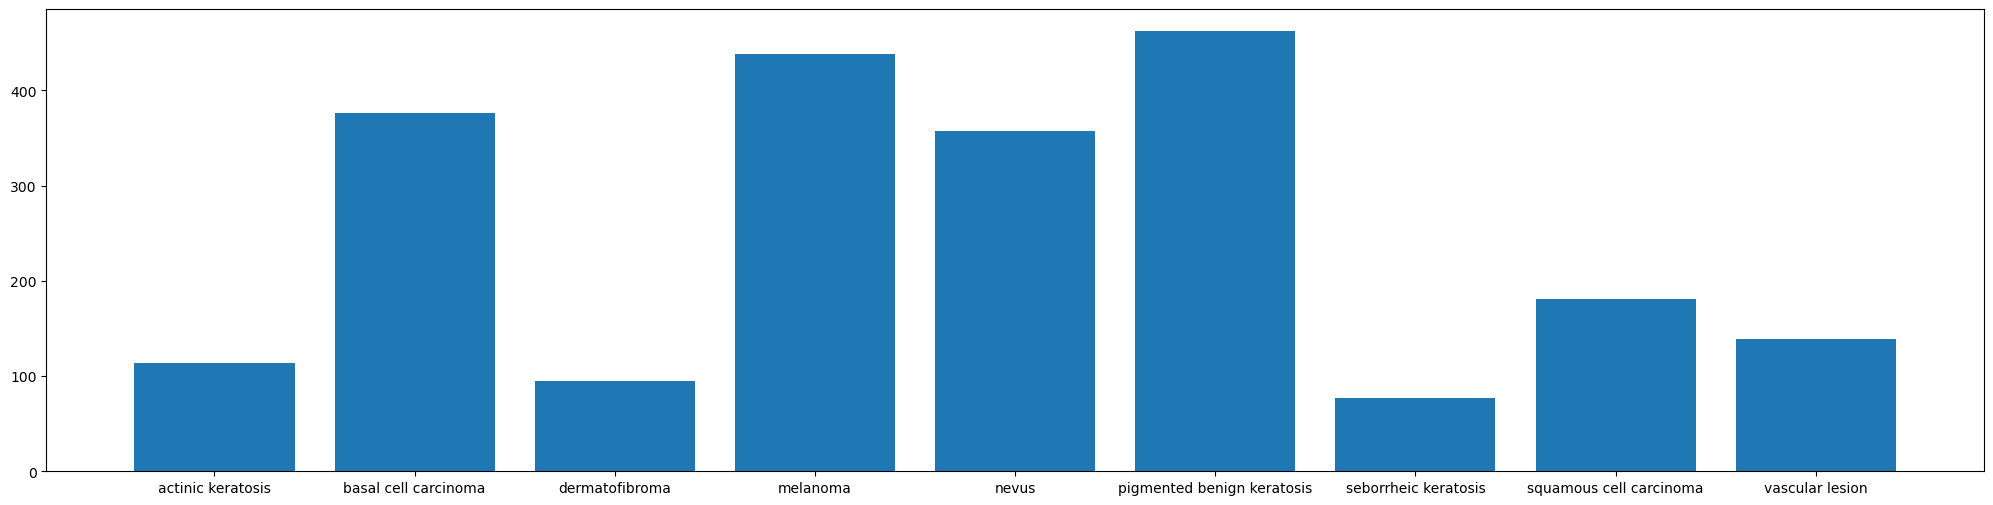

In [79]:
count=[]
for i in class_names:
    count.append(len(list(train_data.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,6))

plt.bar(class_names,count)
plt.show()

In [80]:
!pip install Augmentor

In [81]:
import Augmentor

In [83]:
train_data

WindowsPath('/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [85]:
for i in os.listdir(train_data):
#     class_path=os.path.join(train_data,i)
#     print(class_path)
#     if os.path.isdir(class_path):
        # Create an Augmentor pipeline for the current class
        p = Augmentor.Pipeline(train_data)
        
        # Add augmentation operations to the pipeline
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.flip_left_right(probability=0.5)
        p.flip_top_bottom(probability=0.5)
        
        # Add more augmentation operations as needed
        
        # Set the random seed for reproducibility
        p.set_seed(42)
        
        # Generate the specified number of augmented samples
        p.sample(500)


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E1B69F5C10>: 100%|█| 500/500 [00:11<00:00, 41.70 Samples/


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E1801405D0>: 100%|█| 500/500 [00:13<00:00, 35.89 Samples/


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E182779450>: 100%|█| 500/500 [00:13<00:00, 35.81 Samples/


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E1B407B1D0>: 100%|█| 500/500 [00:16<00:00, 29.44 Samples/


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E1B3E4C710>: 100%|█| 500/500 [00:12<00:00, 39.13 Samples/


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E1806CCD50>: 100%|█| 500/500 [00:18<00:00, 26.62 Samples/


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E193080250>: 100%|█| 500/500 [00:19<00:00, 25.83 Samples/


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E1B24BA650>: 100%|█| 500/500 [00:16<00:00, 29.61 Samples/


Initialised with 2239 image(s) found.
Output directory set to \Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E1B3A7D810>: 100%|█| 500/500 [00:18<00:00, 27.37 Samples/


In [86]:
augumented_sample_path=pathlib.Path('C:/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')
augumented_sample_path

WindowsPath('C:/Users/shaik/MELANOMA/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

In [92]:
len(list(augumented_sample_path.glob('*/*.jpg')))

4500

In [88]:
len(list(train_data.glob('*/output/*.jpg')))

0

In [89]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [93]:
path_list=[]
class_list=[]

        
# Loop through each class directory inside the output folder
for i in class_names:
    for j in augumented_sample_path.glob(i+'/*.jpg'):
        path_list.append(str(j))
        class_list.append(i)


In [95]:
df1=pd.DataFrame(list(zip(path_list,class_list)),columns=['path','label'])

In [96]:
print(df1.shape)
df1.head()

(4500, 2)


,path,label
0,C:\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output\actinic keratosis\actinic keratosis_original_IS...,actinic keratosis
1,C:\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output\actinic keratosis\actinic keratosis_original_IS...,actinic keratosis
2,C:\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output\actinic keratosis\actinic keratosis_original_IS...,actinic keratosis
3,C:\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output\actinic keratosis\actinic keratosis_original_IS...,actinic keratosis
4,C:\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output\actinic keratosis\actinic keratosis_original_IS...,actinic keratosis


In [97]:
final_data_frame=pd.concat([df, df1], ignore_index=True)
final_data_frame.head(5)

,path,label
0,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,\Users\shaik\MELANOMA\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis


In [98]:
final_data_frame.shape

(6739, 2)

In [99]:
final_data_frame['label'].value_counts()

melanoma                      1410
pigmented benign keratosis    1299
basal cell carcinoma          1186
nevus                         1113
squamous cell carcinoma        478
vascular lesion                427
actinic keratosis              312
dermatofibroma                 266
seborrheic keratosis           248
Name: label, dtype: int64

In [100]:
# Create an imageDatagenerator with resccaling parameter
train_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
validation_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [101]:
# Flow images from train and validation directories, applying rescaling and resizing
train_data_generator_sample=  train_data_gen.flow_from_directory(directory=train_data,
                                                                 class_mode='categorical',
                                                                 batch_size=32,
                                                                 target_size=(180,180),
                                                                 shuffle=True,
                                                                 seed=42)

# Flow images from train and validation directories, applying rescaling and resizing
validation_data_generator_sample=  validation_data_gen.flow_from_directory(directory=train_data,
                                                                    class_mode='categorical',
                                                                    batch_size=Batch_size,
                                                                    target_size=image_size,
                                                                    shuffle=False,
                                                                    subset='validation',  # Specify 'validation' subset for validation data
                                                                    seed=42
                                                                    )

Found 6739 images belonging to 10 classes.
Found 1344 images belonging to 10 classes.


In [106]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=5,activation='relu',input_shape=(180,180,3)),
    tf.keras.layers.MaxPool2D(2),
    
    #adding another layer
    tf.keras.layers.Conv2D(64,kernel_size=5,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    
    #adding the antoher layer
    tf.keras.layers.Conv2D(128,kernel_size=5,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    #adding dropout layer
#     tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')  # Output layer with 10 because we have one output folder in whihc we have iamges
])


model_3.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [107]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 176, 176, 32)      2432      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 88, 88, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 84, 84, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 42, 42, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 38, 38, 128)       204928    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 19, 19, 128)      

In [108]:
train_data_generator_sample.samples // train_data_generator_sample.batch_size

210

In [109]:
# Define the number of steps per epoch and validation steps
steps_per_epoch = train_data_generator_sample.samples // train_data_generator_sample.batch_size
validation_steps = validation_data_generator_sample.samples // validation_data_generator_sample.batch_size

# Train the model
history_3 = model_3.fit(train_data_generator_sample,
                    epochs=30,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_data_generator_sample,
                    validation_steps=validation_steps)


Epoch 1/30
210/210 [==============================] - 420s 2s/step - loss: 1.4028 - accuracy: 0.6633 - val_loss: 1.3003 - val_accuracy: 0.6696
Epoch 2/30
210/210 [==============================] - 293s 1s/step - loss: 1.3550 - accuracy: 0.6663 - val_loss: 1.2934 - val_accuracy: 0.6696
Epoch 3/30
210/210 [==============================] - 305s 1s/step - loss: 1.3318 - accuracy: 0.6678 - val_loss: 1.2612 - val_accuracy: 0.6696
Epoch 4/30
210/210 [==============================] - 306s 1s/step - loss: 1.3315 - accuracy: 0.6677 - val_loss: 1.2541 - val_accuracy: 0.6696
Epoch 5/30
210/210 [==============================] - 306s 1s/step - loss: 1.2894 - accuracy: 0.6681 - val_loss: 1.2453 - val_accuracy: 0.6696
Epoch 6/30
210/210 [==============================] - 313s 1s/step - loss: 1.2775 - accuracy: 0.6674 - val_loss: 1.2405 - val_accuracy: 0.6696
Epoch 7/30
210/210 [==============================] - 307s 1s/step - loss: 1.2641 - accuracy: 0.6682 - val_loss: 1.2355 - val_accuracy: 0.6696

 the `accuracy has improved significantly` with the `increased number of epochs`! The  model seems to be `learning effectively` from the data.

It's `important to monitor` both the `training and validation accuracy` and `loss` to ensure that the `model is not overfitting or underfitting`. From the above epochs, it seems that the `validation accuracy is consistently improving` along with the `training accuracy`, which is a good sign.

and the `validation loss` as well. If it `starts increasing` while `the training loss decreases`, `it might indicate overfitting`, and you may need to apply regularization techniques or adjust your model architecture accordingly.

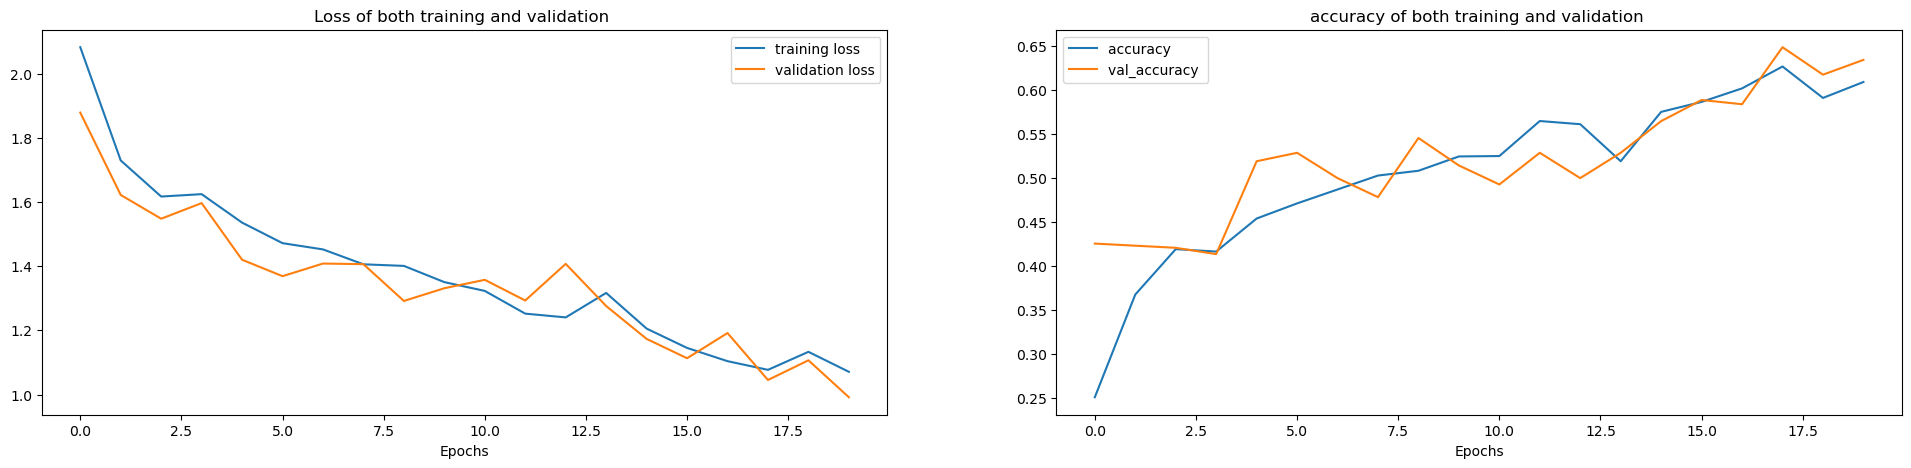

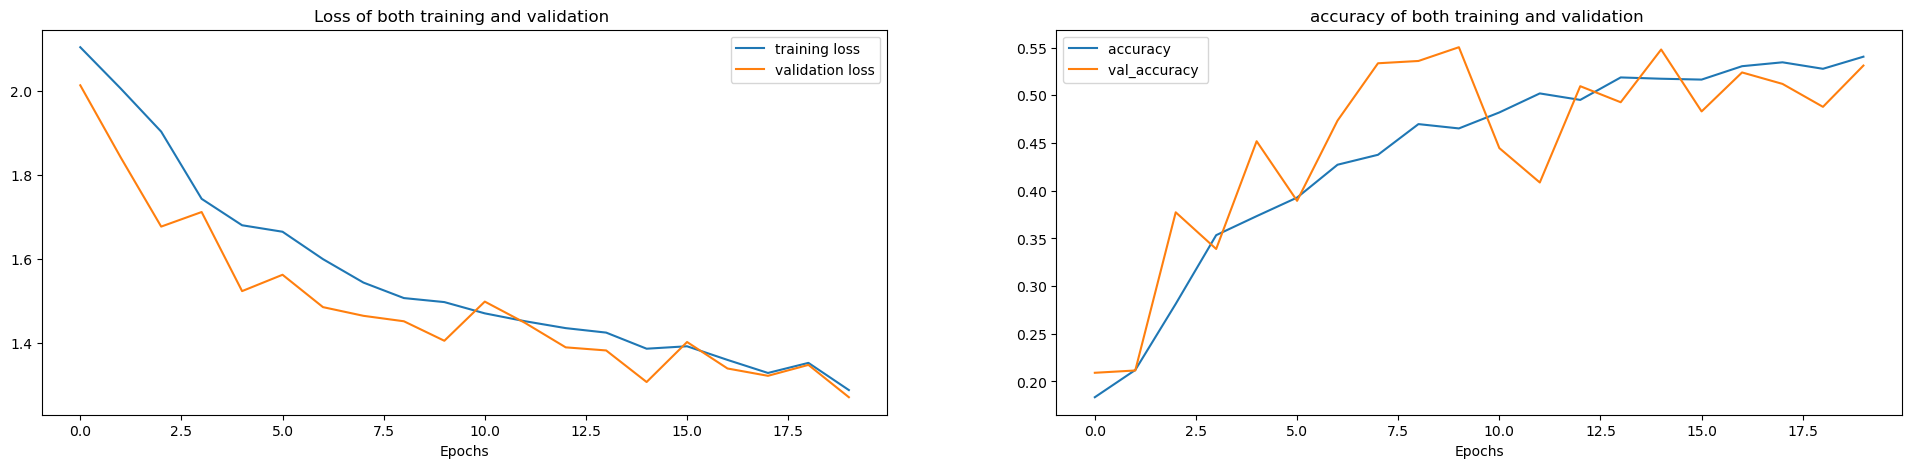

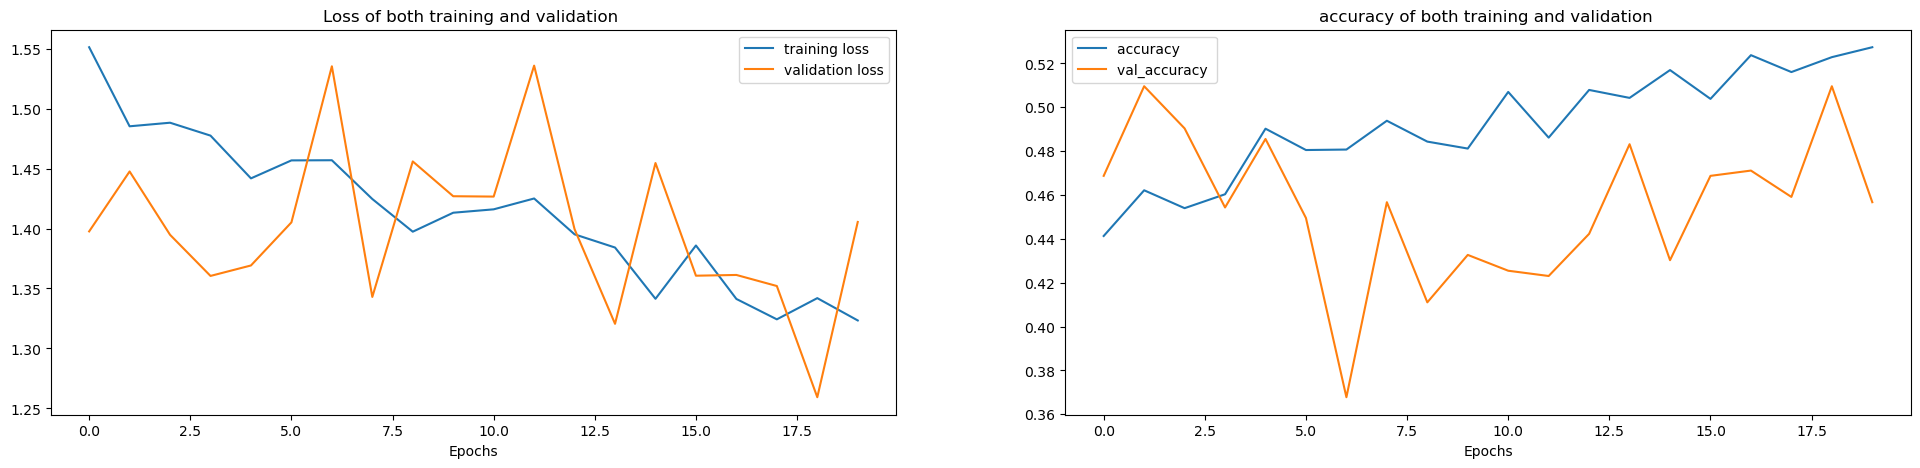

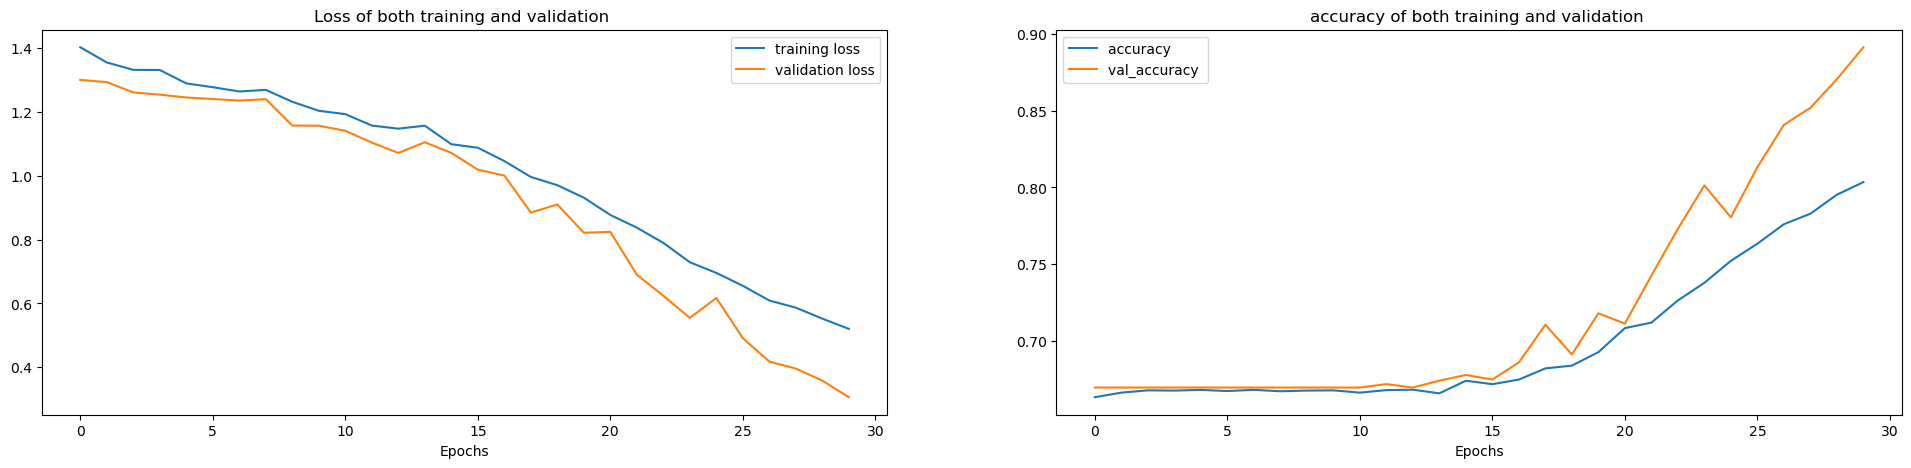

In [202]:
plot_loss(history_1,(24,5))
plot_loss(history_2,(24,5))
plot_loss(history_2_augmented,(24,5))
plot_loss(history_3,(24,5))

it seems like the model is performing  well. Here's what the metrics indicate

- `Accuracy Improvement`: The accuracy has improved steadily over the epochs, reaching `around 80%` at the end of `30 epochs`. This indicates that the model is learning well from the augmented data.

- `Validation Accuracy`: The validation accuracy has also improved consistently, reaching around 89% by the end of training. This indicates that the model is generalizing well to unseen data.

- `Loss Reduction`: The loss (categorical cross-entropy) has decreased steadily over the epochs, which is a `positive sign`. Lower loss values indicate that the model's predictions are closer to the actual labels.

- `Validation Loss`: The validation loss is also decreasing, which indicates that the model is generalizing well to unseen data.

- `Training Time`: The training time per epoch seems reasonable, which suggests that the model training process is efficient.

- `Overfitting`: There's `no clear evidence of overfitting`, as the training and validation accuracies are following a similar trend and the validation accuracy is not significantly lower than the training accuracy

However, it's essential to keep monitoring the training process to ensure that the model is not overfitting. `Overfitting occurs when the model learns to memorize the training data rather than generalize to unseen data`. Signs of overfitting include a significant gap between training and validation performance, where the training performance continues to improve while the validation performance plateaus or degrades.

Overall, based on the  results, it seems like the model is performing well on the augmented dataset, achieving good accuracy and generalization. 

In our case, `since both training and validation loss are decreasing`, and the `accuracy metrics are reasonable`, it doesn't appear that the model is overfitting at the moment. However, it's always a good idea to keep an eye on these metrics and consider techniques like regularization or dropout if overfitting becomes a concern.

In [199]:
# os.listdir('c:/Users/shaik/MELANOMA/cutom images/'),class_names

In [195]:
# plt.figure(figsize=(15,5))

# for i in range(9):
#     custom_path=os.listdir('c:/Users/shaik/MELANOMA/cutom images/')
#     path3='C:/Users/shaik/MELANOMA/cutom images/'+custom_path[i]
#     print(path3)
#     plt.subplot(3,3,i+1)
#     img=mfimg.imread(path3)
#     plt.imshow(img)
#     plt.title([custom_path[i],img.shape])
#     plt.axis(False)
# plt.tight_layout()
# plt.show()  

In [196]:
# # create a function to import image and resize it to be able to be used with our model
# def load_and_prep_image(file_name,img_shape=180):
#     '''Reads an image from filename,turns it into a tensor and reshape it to (imag_shape,img_shape,colour_channels)'''
#     # read in the image
#     img=tf.io.read_file(file_name)
#     # decode the readed the image in to the tensor
#     img=tf.image.decode_image(img)
#     # resize the image 
#     img=tf.image.resize(img,size=[img_shape,img_shape])
#     # rescaling the image ( get the values between 0 and 1)
#     img=img/255.
    
#     return img
    

In [197]:
# # reconfig pred_and_plot function to work with mutli class images

# def pred_and_plot(model,filename,class_names=class_names):
#     '''import an image located at file name makes a prediction with model and plots athe image with the predicted class'''
#     # import the target image and preprocess it
#     img=load_and_prep_image(filename)
    
#     #make predcitoin
#     pred=model.predict(tf.expand_dims(img,axis=0))
# #     add in logic for multi class and get pred_class
#     if len(pred[0])>1:
#         pred_class=class_names[tf.argmax(pred[0])]
#     #get the predictions class in probabilty so round them
#     else:
#         pred_class=class_names[int(tf.round(pred[0]))]
    
# #     plot image and prediction class
#     plt.imshow(img)
#     plt.title(['pred is '+pred_class])
#     plt.axis(False)

In [198]:
# plt.figure(figsize=(20,5))
# for i in range(9):
#     custom_path=os.listdir('c:/Users/shaik/MELANOMA/cutom images/')
#     path3='C:/Users/shaik/MELANOMA/cutom images/'+custom_path[i]
# #     print(path3)
#     plt.subplot(3,3,i+1)
# #     plt.title(class_names[i])
#     pred_and_plot(model_3,path3)
    